In [4]:
#2023 0125 Check pair and concatenate
#2023 0329 주석처리 + update
from datetime import datetime, timedelta, date
from astropy.time import Time
import astropy.io.fits as fits
from glob import glob
import astropy.units as u

import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

# ------------------------------
def Time2JD(_t):
    _temp = str(_t)
    _temp = Time(_temp)
    _temp = float(_temp.jd)
    return _temp

# ------------------------------

file_path_1 ='/userhome/youn_j/Dataset/EUV/EUI_prepV7.2/174_304_concat/*.fits'
file_path_2 = '/userhome/youn_j/Dataset/EUV/EUI_prepV7.1/174_304_concat/*.fits'
# save_path = '/userhome/youn_j/Code/AIA_set/Prep/AIA_PrepV4_230329/EUI/174_304_concat/'


file_name_1 = sorted(glob(file_path_1))
file_name_2 = sorted(glob(file_path_2))

print([len(file_name_1), len(file_name_2)])

series = max([len(file_name_1), len(file_name_2)])
print(series)

# start_time = datetime(2011, 1, 1, 0)
# ref_time = Time2JD(start_time)
# print(ref_time)

# cadence = timedelta(hours = 12)
missing = []
li_1 = []

j = 0
k = 0

# opt_concat = True #or False
opt_concat = False #or False


# fits_file_1 = fits.open(file_name_1[1])
# header_1 = fits_file_1[1].header



[274, 265]
274


In [5]:
# ------------------------------
# series = 10 
for i in range(series):
    try:
        fits_file_1 = fits.open(file_name_1[i+j])
        fits_file_2 = fits.open(file_name_2[i+k])
        
        header_1 = fits_file_1[1].header
        header_2 = fits_file_2[1].header
        fits_time_1 = header_1["DATE-OBS"]
        fits_time_2 = header_2["DATE-OBS"]
        WaveL1 = str(header_1['WAVELNTH'])
        WaveL2 = str(header_2['WAVELNTH'])
        JD_time_1 = Time2JD(header_1["DATE-OBS"])
        JD_time_2 = Time2JD(header_2["DATE-OBS"])

        dt = abs(JD_time_1 - JD_time_2)

        while dt > 0.01: # 10분 이상 관측값이 차이나는 경우에 대하여
            
            t_list = [JD_time_1 , JD_time_2]
            prior = t_list.index(min(t_list))

            if prior == 0: # JD_time_1이 먼저의 관측값인 경우(즉, time_2가 missing)
                j += 1     # time_1 관측값 concat 건너뛰기
                li_1.append(fits_time_1) #건너뛴 time_1 값
                print(fits_time_1, WaveL2, 'value is missing')

                fits_file_1 = fits.open(file_name_1[i+j])
                header_1 = fits_file_1[1].header
                fits_time_1 = header_1["DATE-OBS"]
                JD_time_1 = Time2JD(header_1["DATE-OBS"])

            elif prior == 1:
                k += 1
                li_1.append(fits_time_2)
                print(fits_time_2, WaveL1, 'value is missing')

                fits_file_2 = fits.open(file_name_2[i+k])
                header_2 = fits_file_2[1].header
                fits_time_2 = header_2["DATE-OBS"]
                JD_time_2 = Time2JD(header_2["DATE-OBS"])


            dt = abs(JD_time_1 - JD_time_2) #다시 확인
            
        if opt_concat == True:
            data_1 = fits_file_1[0].data
            data_2 = fits_file_2[0].data

            data_1 = data_1.reshape((*data_1.shape,1)) #tuple to array 
            data_2 = data_2.reshape((*data_2.shape,1)) 


            conc = np.concatenate((data_1,data_2),axis = 2)


            if fits_time_1[:13] != fits_time_2[:13]:
                print("?????????")

#             save = save_path + fits_time_1.replace(":",'')[:13] + '_' + WaveL1 + '_' + WaveL2
#             print(save)
        #     np.save(save, conc)

            hdr = header_2
            hdr['wavelnth'] = "174_304"
            save_fits = save_path + fits_time_1.replace(":",'')[:13] + '_' + WaveL1 + '_' + WaveL2 + '.fits'
            fits.writeto(save_fits, conc, hdr, overwrite=True)
    except IndexError:
        print('finish')
        break
    except NameError as e:           # 범위를 벗어난 인덱스에 접근하여 에러가 발생했을 때 실행됨
        print(e)

print('T00 missing')    
print(li_1)
for j in range(len(li_1)):
        print(li_1[j])

finish
T00 missing
[]


In [ ]:
print(*data_1.shape)

In [34]:
import matplotlib.pyplot as plt
import sunpy.visualization.colormaps as cm
import cv2

a_ = '/userhome/youn_j/Code/AIA_set/Prep/AIA_PrepV4_230329/171_304_concat/2021-12-21T00_171_304.fits'
a = fits.open(a_)
a = a[0].data



r = a[:, :, 0]
g = a[:, :, 1]

print(np.max(g))
# print(*r.shape)
r = 126*(r+1)
r = np.array(r, dtype=np.uint8)
g = 126*(g+1)
g = np.array(g, dtype=np.uint8)

print(np.max(g))



zero = np.zeros((1024, 1024, 1), dtype=np.uint8)
bgz = cv2.merge((r, g, zero))
cv2.imshow("inverse", bgz)


# a_ = '/userhome/youn_j/Code/AIA_set/Prep/AIA_PrepV4_230329/171_304_concat/2021-12-21T00_171_304.fits'
# a = fits.open(a_)
# a = a[0].data
# print(*a.shape,1)

# b = a[:512,:512,0]
# plt.axis('off') 
# plt.imshow(a)

0.5822787
199


(512, 512)
1.1273538
-1.0783186


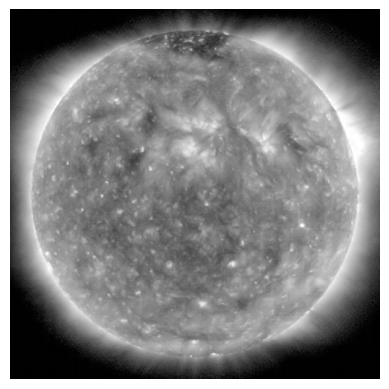

In [3]:
a_ = '/userhome/youn_j/Code/Pix2PixCC/concat/checkpoints/pix2pixCC/Image/Test/280000/2021-01-05T00_171_304_AI.fits'
a = fits.open(a_)
a = a[0].data
print(a.shape)
print(np.max(a))
print(np.min(a))
a = np.clip(a,-1,1)
import matplotlib.pyplot as plt
%matplotlib inline
import sunpy.visualization.colormaps as cm
plt.axis('off') 
plt.imshow(a, cmap = 'gray')
# ,cmap = 'sdoaia335'

In [10]:
# Check pair

from datetime import datetime, timedelta, date
from astropy.time import Time
import astropy.io.fits as fits
from glob import glob
import astropy.units as u

import numpy as np


# ------------------------------
def Time2JD(_t):
    _temp = str(_t)
    _temp = Time(_temp)
    _temp = float(_temp.jd)
    return _temp

# ------------------------------


save_path = '/userhome/youn_j/Code/AIA_set/ConcatV1/fits_171_304_230128_test/*.fits'
refr_path = '/userhome/youn_j/Code/AIA_set/aia_prep_fitsV1/335_test/*.fits'
file_name_1 = sorted(glob(save_path))
file_name_2 = sorted(glob(refr_path))

ser = max([len(file_name_1), len(file_name_2)])

print(len(file_name_1), len(file_name_2), ser)
i = 0
j = 0
k = 0

li = []

for i in range(ser):
      
    try:

        fits_file_1 = fits.open(file_name_1[i+j])
        fits_file_2 = fits.open(file_name_2[i+k])

        header_1 = fits_file_1[0].header
        header_2 = fits_file_2[0].header

        fits_time_1 = header_1["T_OBS"]
        fits_time_2 = header_2["T_OBS"]

        WaveL1 = str(header_1['WAVELNTH'])
        WaveL2 = str(header_2['WAVELNTH'])

        JD_time_1 = Time2JD(header_1["T_OBS"])
        JD_time_2 = Time2JD(header_2["T_OBS"])

        dt = abs(JD_time_1 - JD_time_2)

        while dt > 0.002: # 3min

            t_list = [JD_time_1 , JD_time_2]
            prior = t_list.index(min(t_list))

            if prior == 0:
                j += 1
                li.append(fits_time_1)
                print(fits_time_1, WaveL1)

                fits_file_1 = fits.open(file_name_1[i+j])
                header_1 = fits_file_1[0].header
                fits_time_1 = header_1["T_OBS"]
                JD_time_1 = Time2JD(header_1["T_OBS"])

            elif prior == 1:
                k += 1
                li.append(fits_time_2)
                print(fits_time_2, WaveL2)

                fits_file_2 = fits.open(file_name_2[i+k])
                header_2 = fits_file_2[0].header
                fits_time_2 = header_2["T_OBS"]
                JD_time_2 = Time2JD(header_2["T_OBS"])


            dt = abs(JD_time_1 - JD_time_2)
          
    except IndexError:
        print('i:', i, 'f_1:',i+j, 'f_2:',i+k)
            
        if i+j == len(file_name_1):
            print('OK1')
        else:
            print('Check1')
          
        if i+j == len(file_name_1):
            print('OK2')
          
        else:
            print('Check2')
        if ser == i:    
            break  


print(li)

327 327 327
[]
